# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


데이터 살펴보기

In [4]:
!pip install xlrd==1.2.0

     |████████████████████████████████| 103 kB 5.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [3]:
df = pd.read_excel('/content/drive/MyDrive/boston/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


## 데이터 타입과 결측값 확인하기

In [8]:
## 데이터 타입 확인
df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
B            float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [9]:
## 결측치가 없다?
for col in df.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df[col].isnull().sum() / df[col].shape[0]))
    print(msg)

column:       CRIM	 Percent of NaN value: 0.00%
column:         ZN	 Percent of NaN value: 0.00%
column:      INDUS	 Percent of NaN value: 0.00%
column:       CHAS	 Percent of NaN value: 0.00%
column:        NOX	 Percent of NaN value: 0.00%
column:         RM	 Percent of NaN value: 0.00%
column:        AGE	 Percent of NaN value: 0.00%
column:        DIS	 Percent of NaN value: 0.00%
column:        RAD	 Percent of NaN value: 0.00%
column:        TAX	 Percent of NaN value: 0.00%
column:    PTRATIO	 Percent of NaN value: 0.00%
column:          B	 Percent of NaN value: 0.00%
column:      LSTAT	 Percent of NaN value: 0.00%
column:       MEDV	 Percent of NaN value: 0.00%
column:  CAT. MEDV	 Percent of NaN value: 0.00%


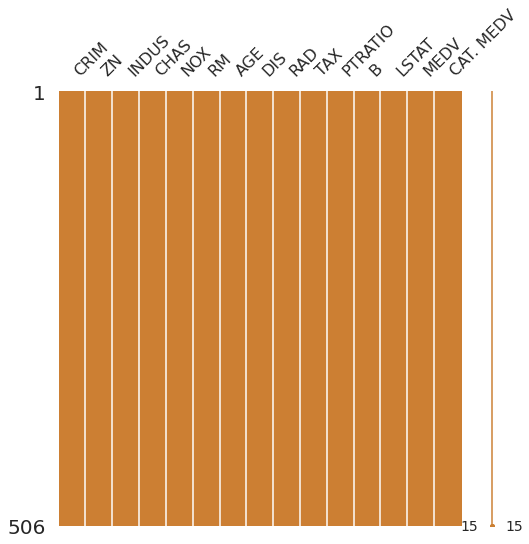

In [11]:
# misingno 라이브러리를 Null 시각화
msno.matrix(df=df.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

# | 결론: 결측치는 없는 것으로 판명됨

주택가격 (`MEDV`)과 관련 있는 Factor를 찾아보세요
- 대형 평수 vs 소형 평슈
- 노후화 정도와 집값의 관계는?
- 직주근접?
- 찰스강뷰?
- 직장이 가까우면서 소형 평수인 부동산의 가격은?

## 데이터 분포 확인하기

## target label : MEDV

MEDV에 대해서 알아보자

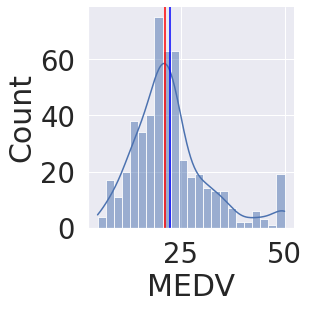

In [12]:
'''
빨간선이 중앙값 
파란선이 평균 : 22.532806

치우어치지 않은 정규 분포를 따르는 모습이다
따라서 log를 안 씌워도 될 듯
'''

## SalePrice의 확률밀도함수를 그려보겠습니다
sns.displot(df['MEDV'], kde=True)

## 평균과, 중간값으로 수직선을 그려보겠습니다.
plt.axvline(df['MEDV'].mean(), color='blue')
plt.axvline(df['MEDV'].median(), color='red')

# Base Model

만일 가격을 처음으로 예측한다고 할 때, 가장 간단하고 직관적인 방법으로 평균이나 중간값을 이용해 보는 것도 좋은 선택일 것입니다.

#### 기준모델(Baseline Model)
이렇게 예측 모델을 구체적으로 만들기 전에 가장 간단하면서도 직관적이면서 최소한의 성능을 나타내는 기준이 되는 모델을 기준모델 이라고 합니다.
여기서는 평균값을 기준으로 사용해서 평균기준모델이라고 말할 수 있겠습니다.

참고로 문제별로 기준모델은 보통 다음과 같이 설정합니다.
- 분류문제: 타겟의 최빈 클래스
- 회귀문제: 타겟의 평균값
- 시계열회귀문제: 이전 타임스탬프의 값

| Base Model은 평균값인 22.532806

# Target Label 분포 확인

데이터 분석에 있어서 target label의 분포가 어떤지 잘 확인해야 한다.

바이너리 분류 문제에서 1과 0 의 분포가 어떠냐에 따라 모델 평가 방법이 달라지기 때문이다.

여기서 CAT.MEDV 특성이 0 과 1의 분포이므로 한 번 시각화를 해보겠다.

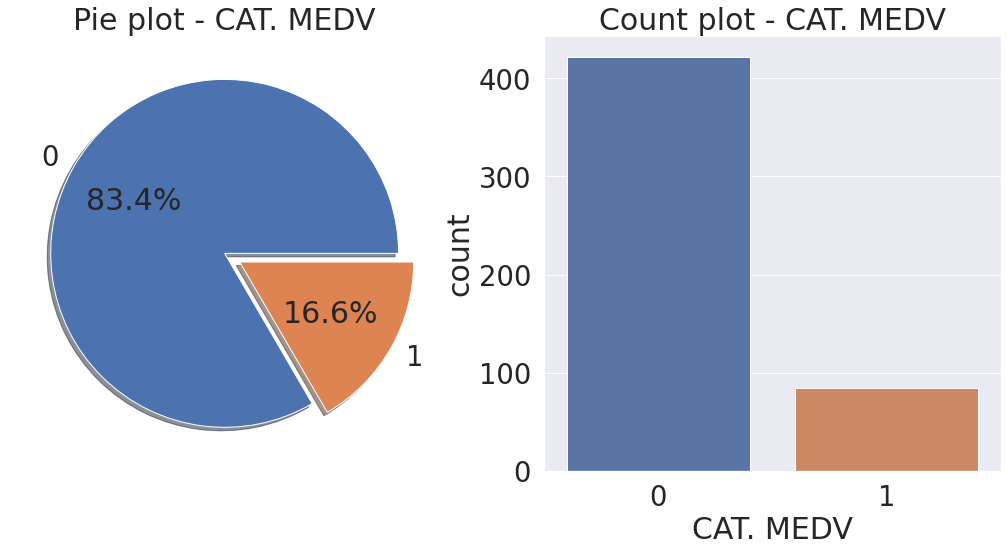

In [14]:
'''
MEDV 가 30000을 넘은 것이 16.6%
넘지 못한것이 83.4%이다.

바이너리 클래스가 약 8:2정도로 불균형인 모습인 것을 볼 수 있다.

'''
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df['CAT. MEDV'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - CAT. MEDV')
ax[0].set_ylabel('')
sns.countplot('CAT. MEDV', data=df, ax=ax[1])
ax[1].set_title('Count plot - CAT. MEDV')

plt.show()

# EDA
본격적인 데이터 분석

데이터 안의 숨겨진 사실을 찾아보기 위해 시각화를 진행합니다

## EDA에 들어가기 전에 가설을 세워보자
1. 찰스강, 즉 우리나라로 치면 한강뷰 아파트 가격이 높듯이 찰스강이 1인 경우가 집값이 높을 것이다. (찰스강의 경계에 위치한 경우 1, 아니면 0)
2. 직장과 가까우면 집값이 높을 것이다. (DIS	직업센터까지의 접근성 지수가 클수록 집값 증가)
3. 거주지역이 평방미터가 넓을 수록 집값이 비쌀 것이다.(ZN	25,000 평방피트를 초과하는 거주지역의 비율이 높을 수록)

## 1. 찰스강

In [16]:
## CHAS가1 인경우, 즉 찰스강변 뷰 집이 35개로 매우 적다.
df[['CHAS', 'MEDV']].groupby(['CHAS'], as_index=True).count()

,MEDV
CHAS,
0,471
1,35


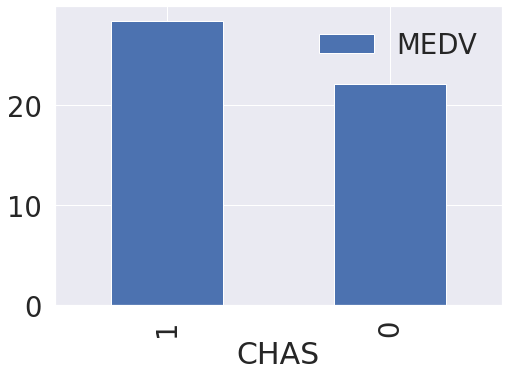

In [17]:
# 찰스강 뷰의 집값 평균과 찰스강 뷰 아닌 집의 평균을 비교해 본 결과
# 찰스강 뷰 집값이 약간 더 나가는 모습을 볼 수 있었다.
df[['CHAS', 'MEDV']].groupby(['CHAS'], as_index=True).mean().sort_values(by='MEDV', ascending=False).plot.bar()

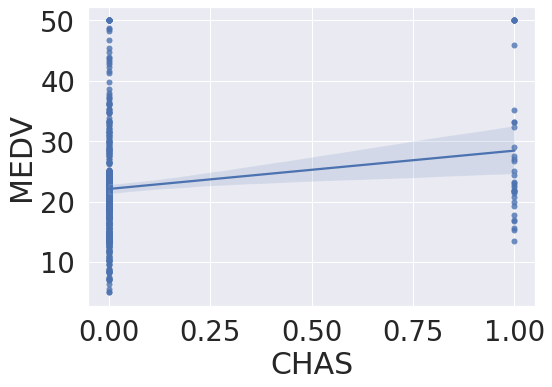

In [18]:
# 찰스강 뷰가 아닌 집은 다양한 집값 분포로 이루어 진 것을 볼 수 있고
# 찰스강 뷰인 곳은 조금더 한정적인 분포로 존재하는 것을 볼 수 있다.
# 평균적으로 찰스강 뷰가 더 집값이 높다.
sns.regplot(df['CHAS'], df['MEDV'])

# | 찰스강 뷰인 집값의 평균이 더 높았다. 따라서 나의 가설이 맞았다!

## 직업센터까지의 접근성 지수

In [22]:
print('제일 높은 DIS 지수 : {:.1f} '.format(df['DIS'].max()))
print('제일 낮은 DIS 지수 : {:.1f} '.format(df['DIS'].min()))
print('평균 DIS 지수 : {:.1f} '.format(df['DIS'].mean()))

제일 높은 DIS 지수 : 12.1 
제일 낮은 DIS 지수 : 1.1 
평균 DIS 지수 : 3.8 


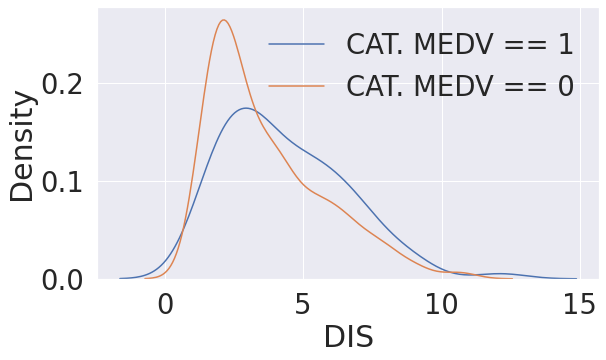

In [25]:
'''
분포를 보면 30000 달러 이상인 집값의 집이 30000달러 미만의 집들보다 거리 지수가 평균적으로
더 높은 분포를 가지는 것을 확인 할 수 있었음
'''

fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df[df['CAT. MEDV'] == 1]['DIS'], ax=ax)
sns.kdeplot(df[df['CAT. MEDV'] == 0]['DIS'], ax=ax)
plt.legend(['CAT. MEDV == 1', 'CAT. MEDV == 0'])
plt.show()

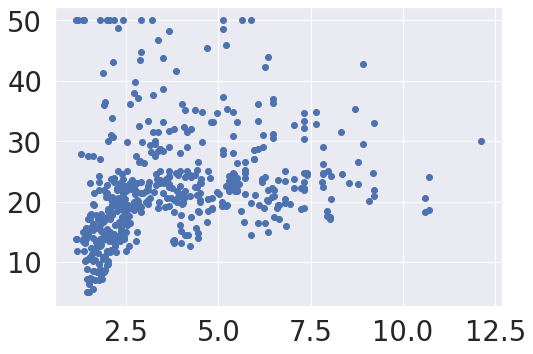

In [26]:
'''
y축이 MEDV
x축이 DIS

내가 생각했던 대로 나오지 않았다.

거리지수가 낮아도 비싼 집이 많았고
거리지수가 높을수록 오히려 비싼 집이 적었다.

거리지수가 낮은것이 더 좋은 특성일 것일까?

그래도 이 거리지수가 집값에 영향을 지대하게 끼치는건 아니라고 생각된다.

'''
## matplotlib scatter plot
plt.scatter(df['DIS'], df['MEDV'])

# | 결론: 거리지수가 낮을수록 집값이 비싸지는 경향을 보이긴 하지만, 

거리지수는 집값에 영향을 크게 주지 않는 것으로 보인다. 즉 선형적인 관계를 보이지 않는다.

## ZN	25,000 평방피트를 초과하는 거주지역의 비율 이 높을 수록 집값이 비쌀까?

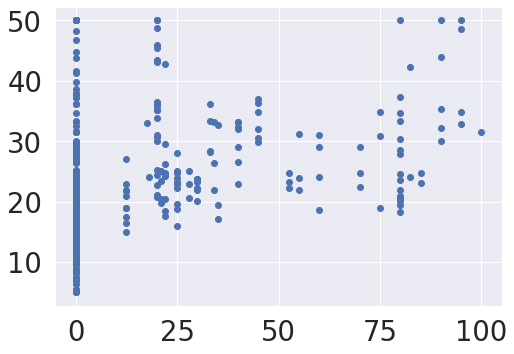

In [27]:
## matplotlib scatter plot
## 산점도를 보면 ZN 값이 0 일때에도 비싼 집값을 가진 집이 많다는 것을 볼 수 있고
## 뚜렷한 선형관계를 보이지 않는 것을 볼 수 있다.
plt.scatter(df['ZN'], df['MEDV'])

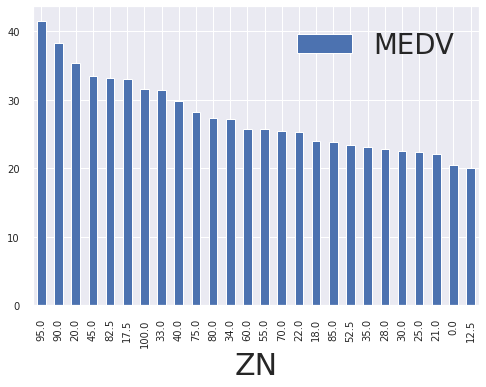

In [31]:
## ZN값이 무조건적으로 크다고 집값이 커지는건 아니다.
## 각 ZN에 대해서 집값을 평균을 내봤는데, 95인 경우가 가장 크지만 3위에 20인 경우가 있는 것을 보아
## 선형적인 관계가 아닌 것을 또 알 수 있다.
df[['ZN', 'MEDV']].groupby(['ZN'], as_index=True).mean().sort_values(by='MEDV', ascending=False).plot.bar(fontsize=10)

# | 따라서 ZN 값이 크다고 집값이 평균적으로 높지는 않다. 즉 선형적인 관계가 아니다.

# 가설 검증

1. O
2. X
3. X

3개의 가설중에 단 한 개만 맞추고 나머지 2번 3번에 대한 가설은 틀렸다.

그러면 도대체 어떤 특성이 집값에 영향을 가장 많이 주는 것일까? 

한 번에 알아볼 수 있는 방법은 없는 것일까?

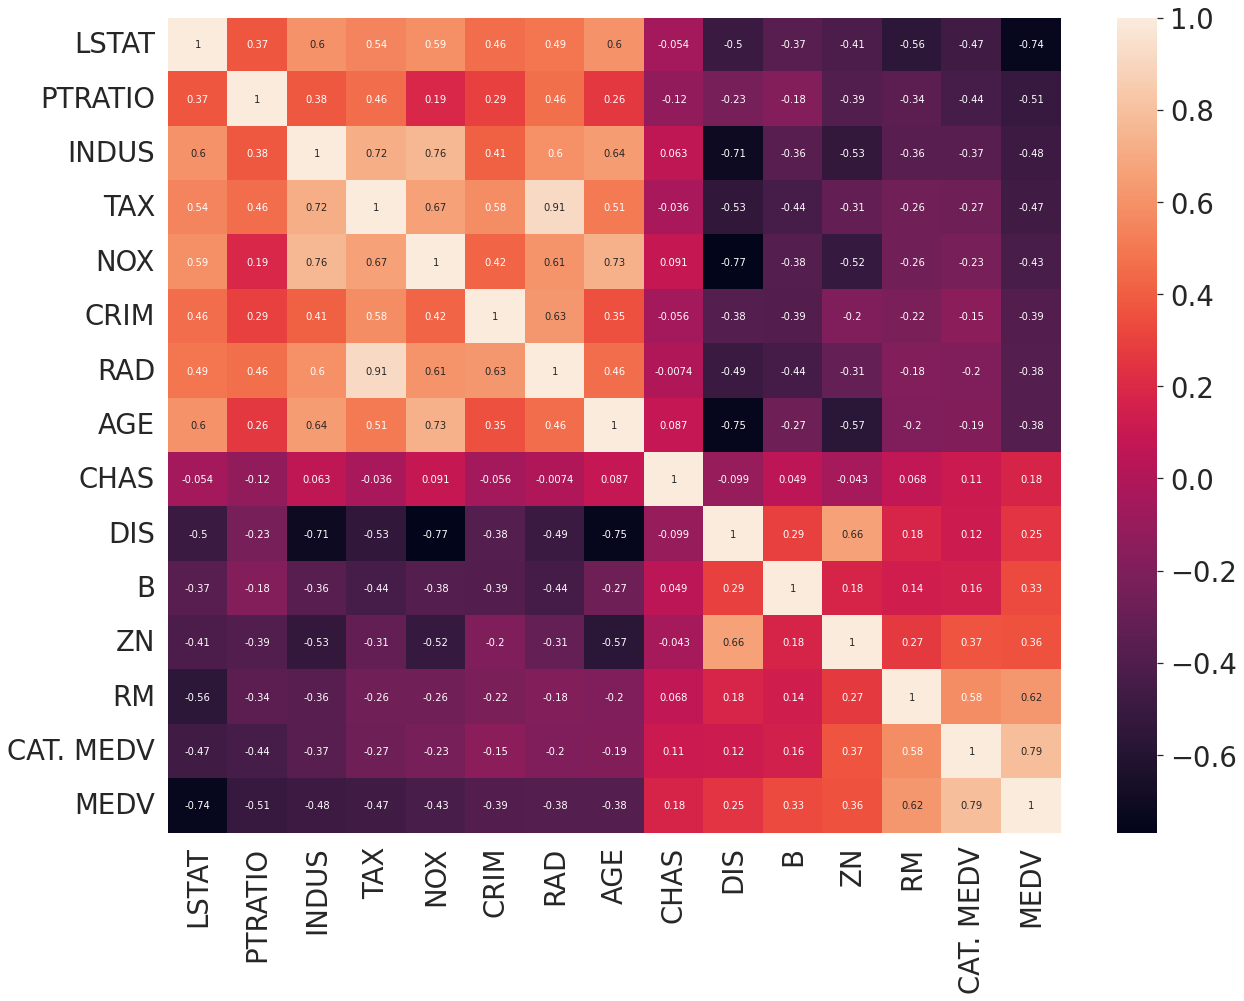

In [56]:
corr=df.corr()
top_corr=df[corr.nsmallest(15,'MEDV')['MEDV'].index].corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(20,15)
sns.heatmap(top_corr, annot=True, ax=ax1, annot_kws={"size": 10})

히트맵 결과
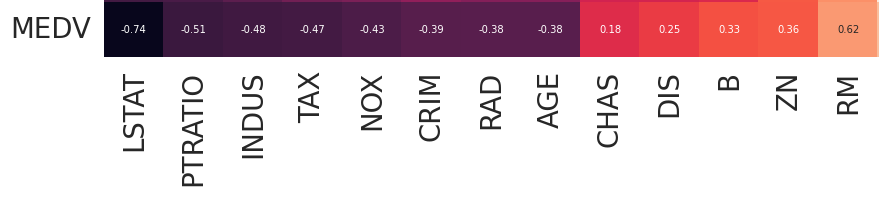

- 위 그래프를 보면 CAT. MEDV는 Target Data를 바이너리로 바꾼 데이터 이므로 제외하면 가장 높은 양의 상관계수를 갖는 특성은 RM, 그리고 가장 높은 음의 상관 계수를 갖는 특성은 LSTAT인것을 확인 할 수 있었다.

- 또한 내가 잘못 생각하고 있었던 것도 확인 가능했다. CHAS가 ZN, DIS 보다 상관 계수가 더 높다고 생각했는데 Heatmap 상에서는 3 중에 가장 낮은 것으로 나와 있었다.

- 수치상으로는 ZN이 2번째로 양의 상관계수가 높았고, DIS는 4위로 높았으며 CHAS는 5위로 높았다. 따라서 나의 가설이었던 ZN, DIS, CHAS 모두 양의 상관관계가 높은 특성인 것은 어느정도는 맞다는 것을 알 수 있었다.

## RM	방의 수 

- 역시 방이 많으면 집값이 비싸구나~

In [34]:
print('제일 많은 방의 갯수 : {:.1f} '.format(df['RM'].max()))
print('제일 적은 방의 갯수 : {:.1f} '.format(df['RM'].min()))
print('평균 방의  갯수 : {:.1f} '.format(df['RM'].mean()))

제일 많은 방의 갯수 : 8.8 
제일 적은 방의 갯수 : 3.6 
평균 방의  갯수 : 6.3 


### 여기서 잠깐!

방의 갯수가 왜 실수형이지??? 정수형으로 바꿔야겠는걸!?

In [36]:
df['RM'] = df['RM'].astype(int)

In [37]:
df['RM']

0      6
1      6
2      7
3      6
4      7
      ..
501    6
502    6
503    6
504    6
505    6
Name: RM, Length: 506, dtype: int64

In [38]:
print('제일 많은 방의 갯수 : {:.1f} '.format(df['RM'].max()))
print('제일 적은 방의 갯수 : {:.1f} '.format(df['RM'].min()))
print('평균 방의  갯수 : {:.1f} '.format(df['RM'].mean()))

제일 많은 방의 갯수 : 8.0 
제일 적은 방의 갯수 : 3.0 
평균 방의  갯수 : 5.8 


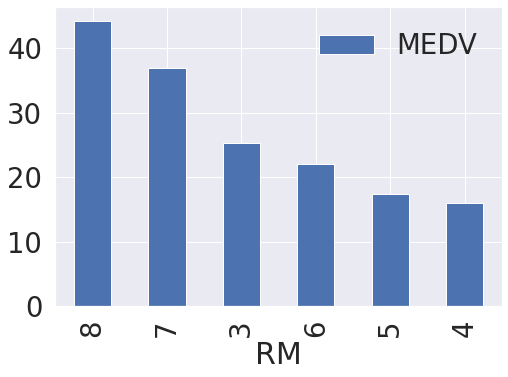

In [43]:
'''
방의 갯수가 많을 수록 집값이 비싸지는 것을 볼 수 있었지만, 
방이 3개인 경우가 6, 5 ,4 인 경우 보다 비싸다는 사실도
알 수 있었다.
'''

df[['RM', 'MEDV']].groupby(['RM'], as_index=True).mean().sort_values(by='MEDV', ascending=False).plot.bar()

# | 방의 갯수가 많을 수록 집값이 비싸진다!

## LSTAT 흑인 비율이 낮을 수록 집값이 비싸다?

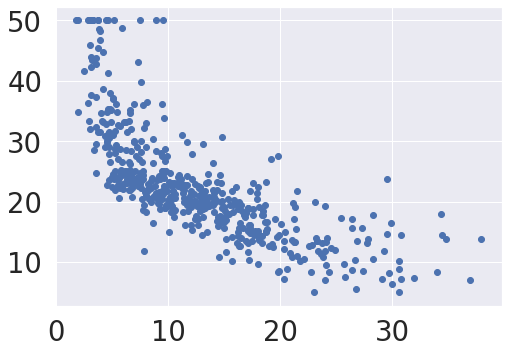

In [57]:
## matplotlib scatter plot
plt.scatter(df['LSTAT'], df['MEDV'])

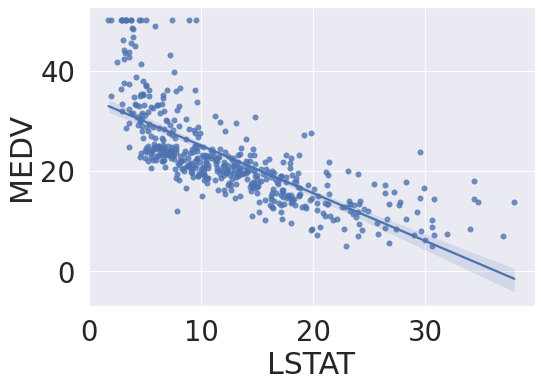

In [58]:
sns.regplot(df['LSTAT'], df['MEDV'])

거의 엄청난 기울기로 흑인 비율이 낮을 수록 집값이 커지는 것을 볼 수 있다.

# | 집값을 결정하는 가장 큰 요소는 흑인의 비율이다. 흑인의 비율이 낮을 수록 집값이 높아졌다. 

## NOX	일산화질소 농도가 낮을 수록 집값이 비싸다!?

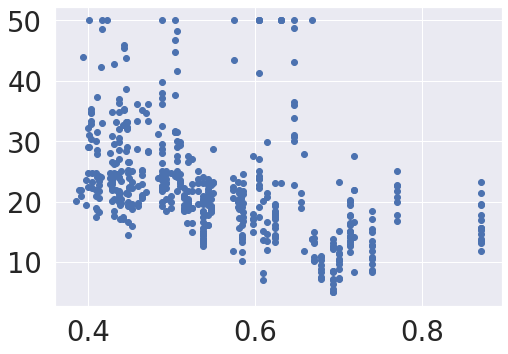

In [44]:
## matplotlib scatter plot
plt.scatter(df['NOX'], df['MEDV'])

산점도 상에서 농도가 낮을 수록 집값이 상승하는 것을 볼 수 있었다.

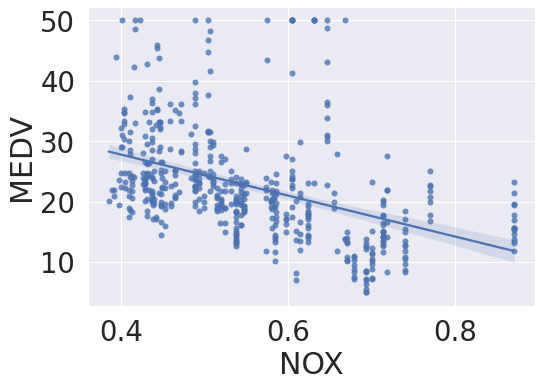

In [45]:
sns.regplot(df['NOX'], df['MEDV'])

회귀 선을 그어도 왼쪽 위로 올라가는 그래프를 확인 가능함, 즉 음의 상관계수가 높은 것을 확인 했다.

| 즉 이산화 농도가 낮을 수록! 집값은 비싸진다!

In [70]:
# MEDV에 대한 CORR
corr_df = df.corr()['MEDV']
corr_df

CRIM        -0.388305
ZN           0.360445
INDUS       -0.483725
CHAS         0.175260
NOX         -0.427321
RM           0.621692
AGE         -0.376955
DIS          0.249929
RAD         -0.381626
TAX         -0.468536
PTRATIO     -0.507787
B            0.333461
LSTAT       -0.737663
MEDV         1.000000
CAT. MEDV    0.789789
Name: MEDV, dtype: float64

In [82]:
# 절대값을 씌우고 정렬
sorted_corr_df = corr_df.abs().sort_values(ascending=False)
sorted_corr_df

MEDV         1.000000
CAT. MEDV    0.789789
LSTAT        0.737663
RM           0.621692
PTRATIO      0.507787
INDUS        0.483725
TAX          0.468536
NOX          0.427321
CRIM         0.388305
RAD          0.381626
AGE          0.376955
ZN           0.360445
B            0.333461
DIS          0.249929
CHAS         0.175260
Name: MEDV, dtype: float64

In [83]:
# MEDV, CAT. MEDV 제거 후 정렬
sorted_corr_df = sorted_corr_df[2:]
sorted_corr_df

LSTAT      0.737663
RM         0.621692
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

# 마지막 결론

보스턴 집값을 예측 할 때 LSTAT, RM, PTRATIO ... 순으로 집값에 영향을 크게 주는 (상관계수는 절대값이 클수록 Target에 영향을 크게 준다) 것을 알아냈다.

- 흑인의 비율이 낮고
- 방의 갯수는 많으며
- 학생-교사 비율은 높은

그러한 집이 집값이 높았다.

<div class="alert alert-block alert-success">
<b>채점기준</b> <br>
<ul>
    <li>데이터를 3건이 상의 변수를 분석했는가? </li>
    <li>데이터를 분류한 기준을 논리적으로 정리했는가</li>       
    <li>데이터를 차트로 시각화했는가? </li>
    <li>결과를 분석해서 정리했는가? </li>       
    <li>심도있게 분석했는가? </li>     
</div>